In [14]:
from itertools import chain

from IPython.display import Image
from dotenv import load_dotenv
from langchain import hub
from langchain.agents import AgentExecutor
from langchain.agents.react.agent import create_react_agent
from langchain_core.output_parsers.pydantic import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnableLambda
from langchain_openai import ChatOpenAI
from langchain_tavily import TavilySearch

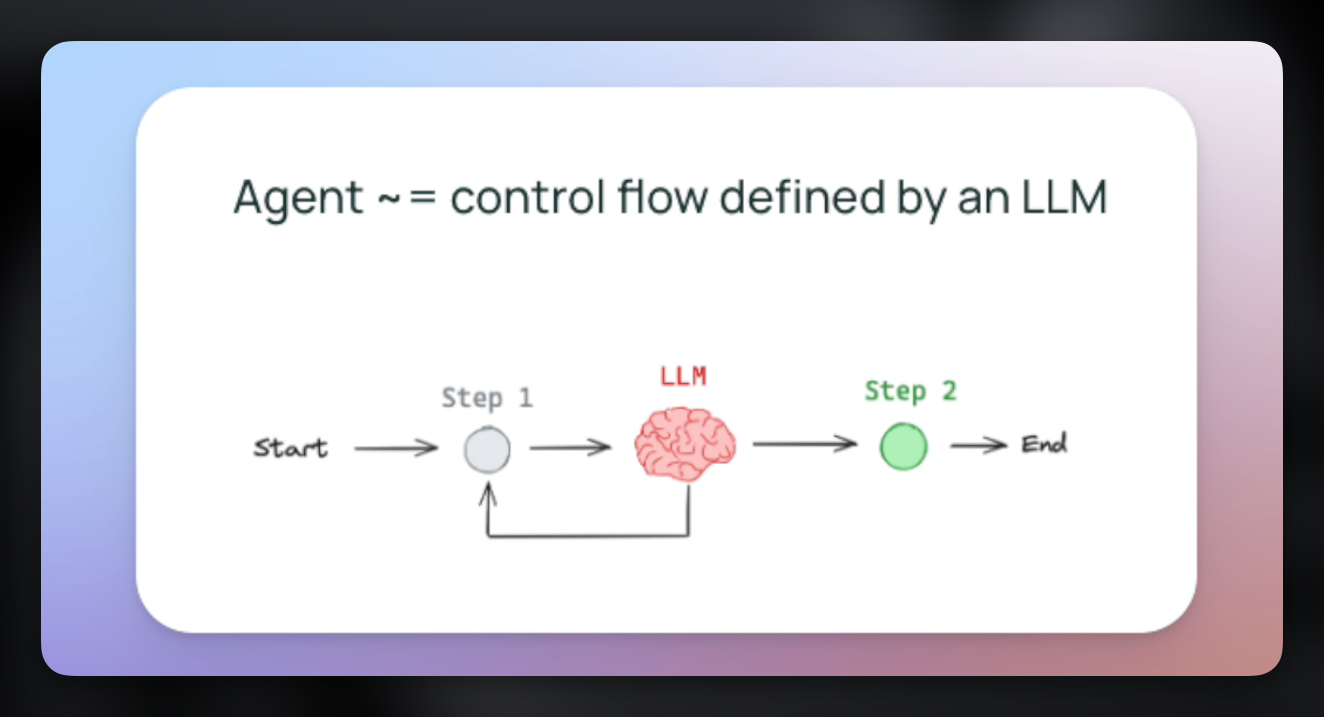

In [2]:
Image("Images/CleanShot 2025-09-22 at 17.03.42.png")

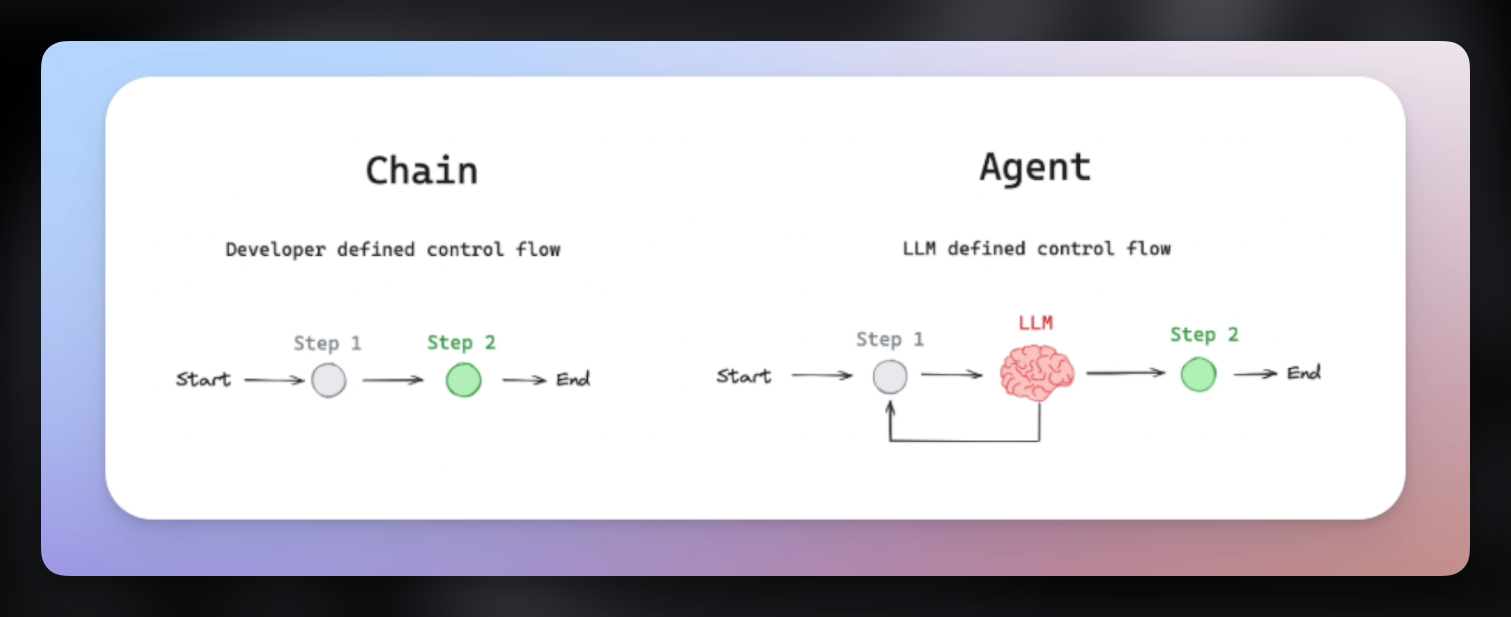

In [3]:
Image("Images/CleanShot 2025-09-22 at 17.26.32.png")

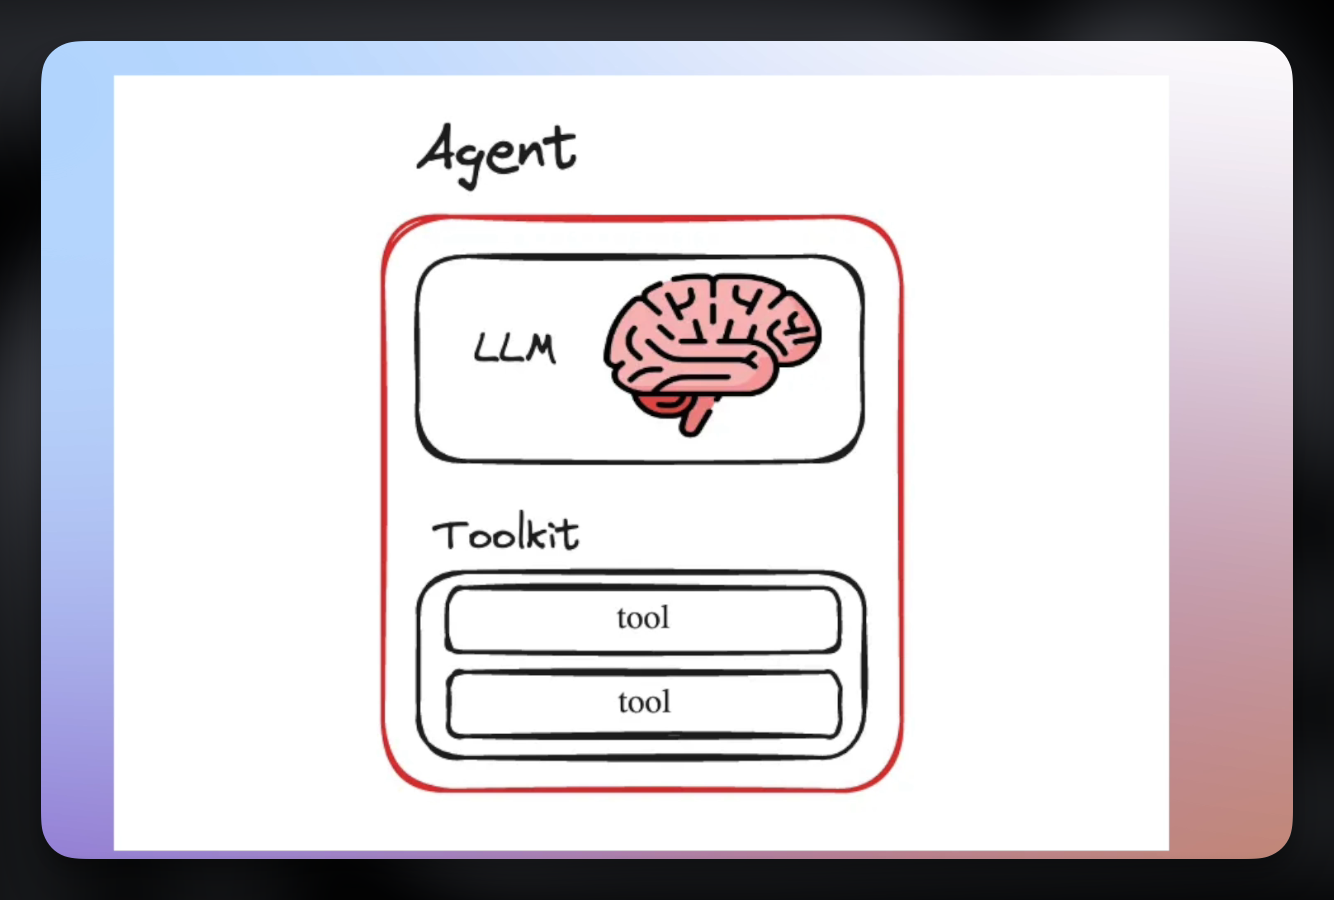

In [4]:
Image("Images/CleanShot 2025-09-22 at 17.27.40.png")

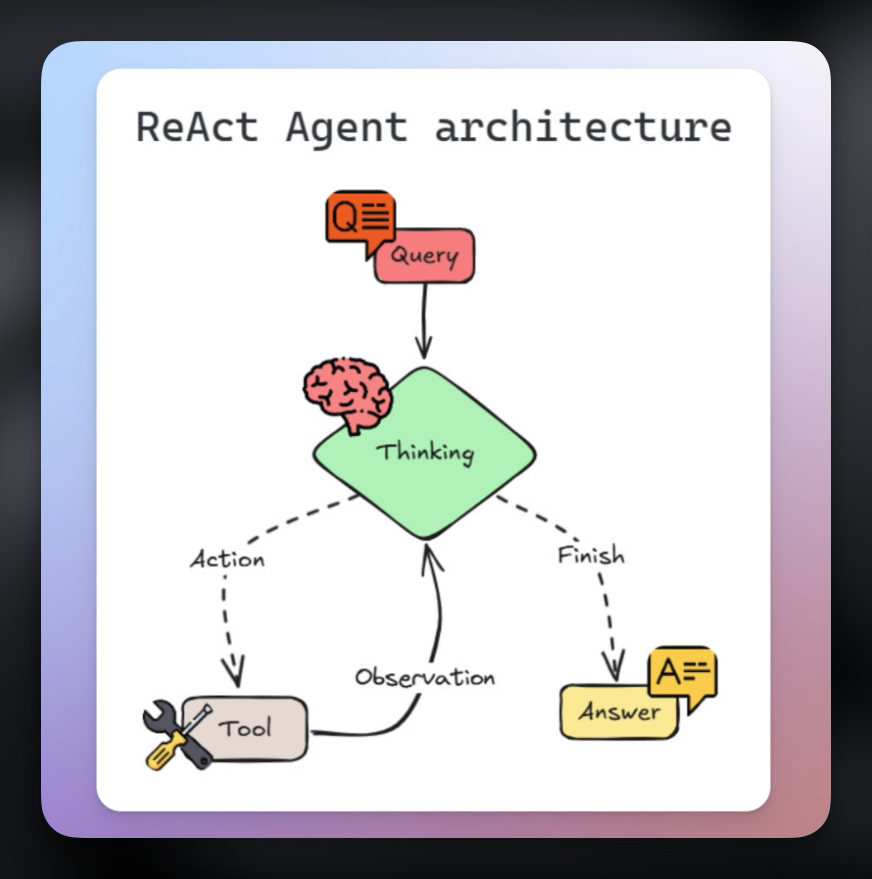

In [5]:
Image("Images/CleanShot 2025-09-22 at 17.28.32.png")

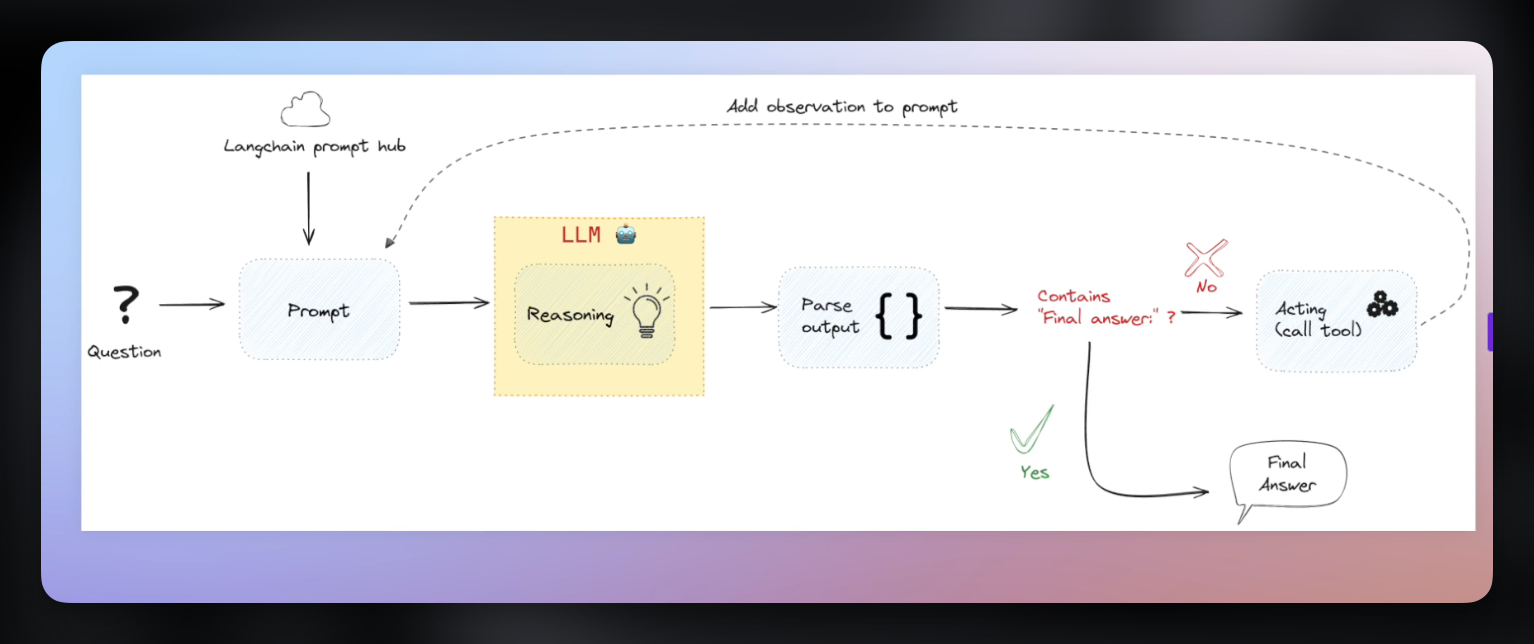

In [6]:
Image("Images/CleanShot 2025-09-22 at 17.31.45.png")

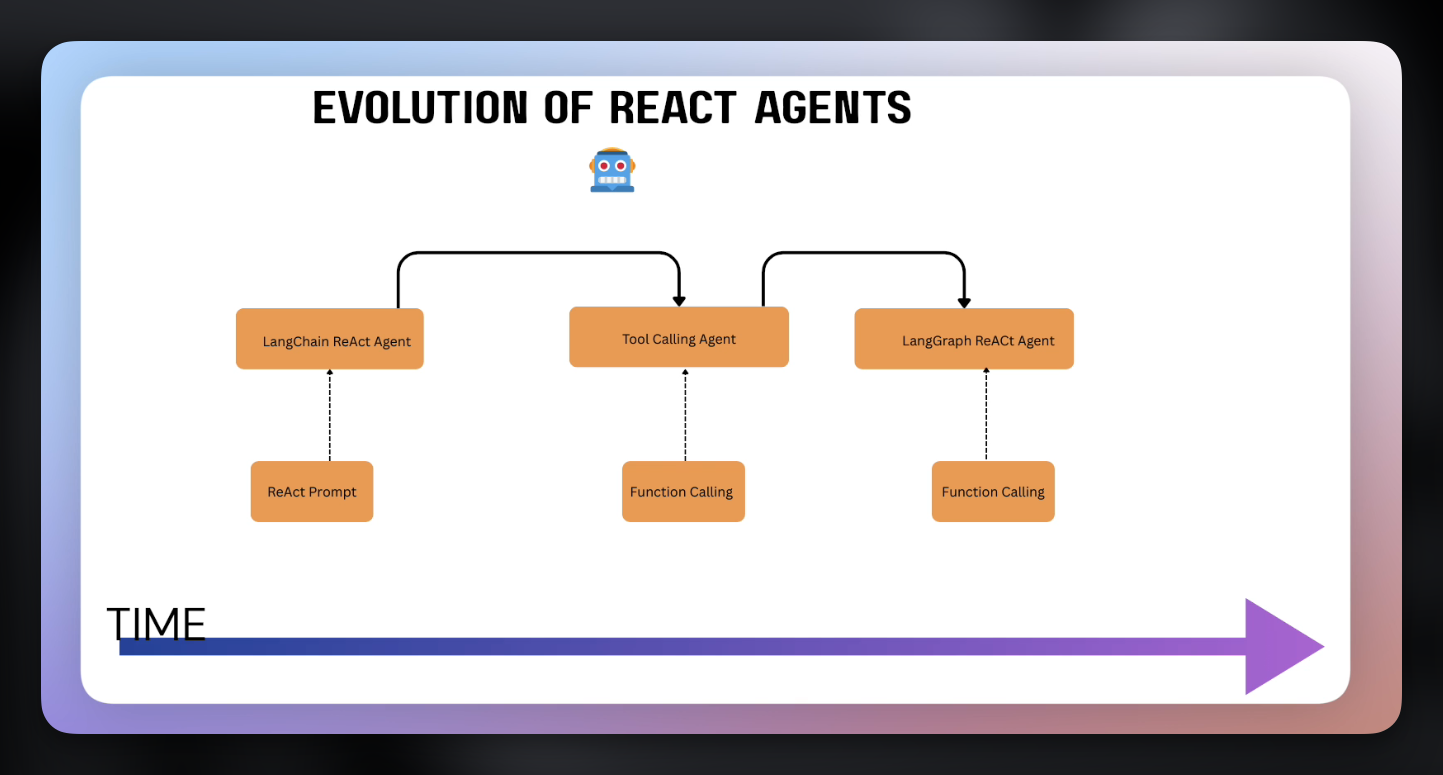

In [7]:
Image("Images/CleanShot 2025-09-22 at 17.32.42.png")

In [8]:
# https://app.tavily.com/home
# https://python.langchain.com/api_reference/langchain/agents/langchain.agents.react.agent.create_react_agent.html
# https://smith.langchain.com/hub
# https://python.langchain.com/docs/how_to/agent_executor/

In [11]:
load_dotenv()

True

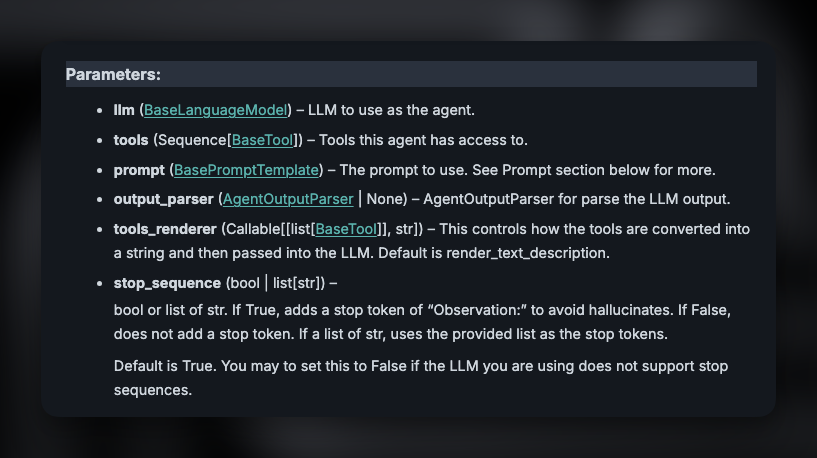

In [12]:
Image("Images/CleanShot 2025-09-22 at 17.43.08.png")

In [13]:
tools=[
    TavilySearch(
        k=5,
        return_direct_answer=True,
        return_metadata=True,
        return_documents=True,
    )
]

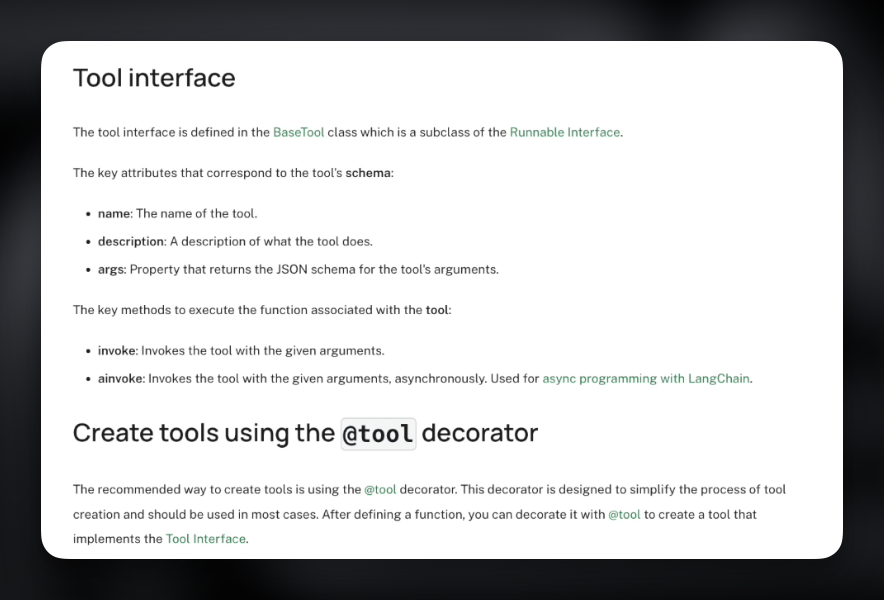

In [15]:
Image("Images/CleanShot 2025-09-22 at 17.46.39.png")

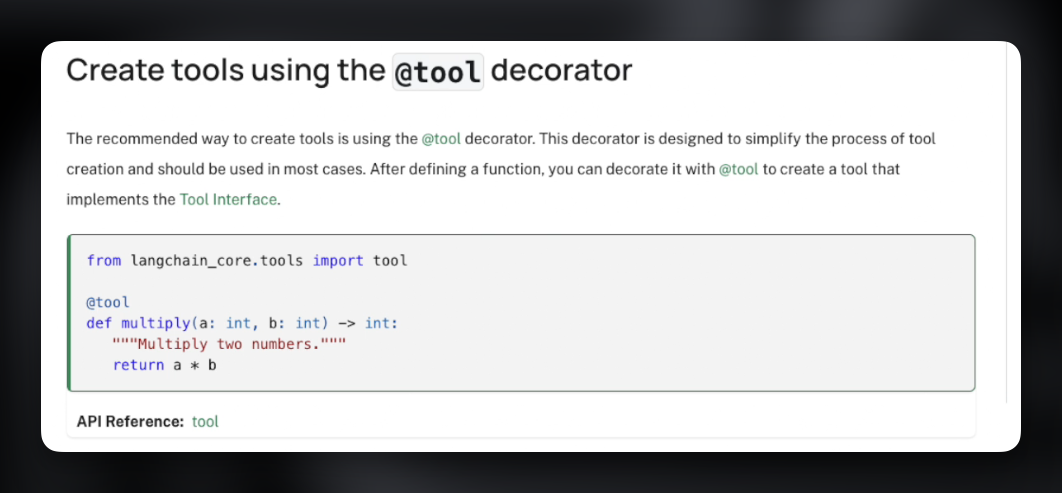

In [16]:
Image("Images/CleanShot 2025-09-22 at 17.47.48.png")

In [17]:
llm= ChatOpenAI(model="gpt-4-turbo", temperature=0)
react_prompt=hub.pull("hwchase17/react")

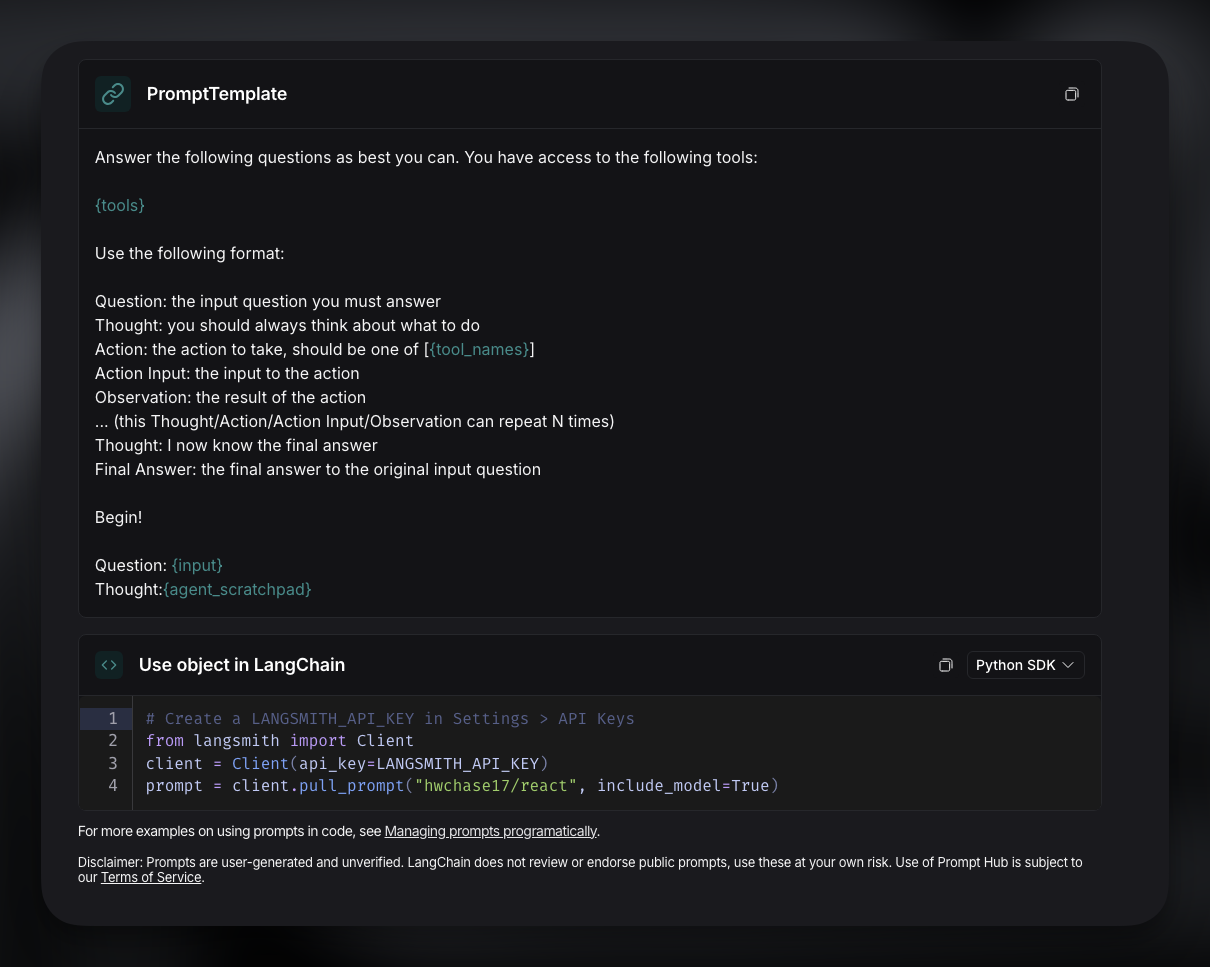

In [18]:
# https://smith.langchain.com/hub/hwchase17/react
Image("Images/CleanShot 2025-09-22 at 18.12.34.png")

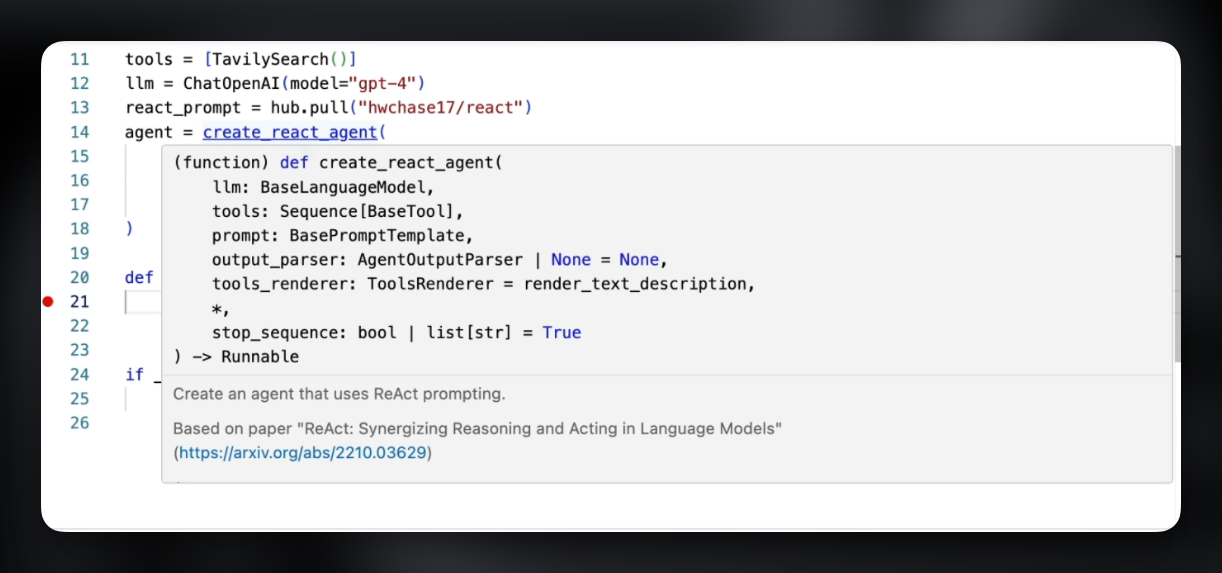

In [19]:
Image("Images/2025-09-22/CleanShot 2025-09-22 at 18.40.53.png")

In [22]:
agent=create_react_agent(
    llm=llm,
    tools=tools,
    prompt=react_prompt
)

agent_executor=AgentExecutor.from_agent_and_tools(
    agent=agent,
    tools=tools,
    verbose=True,
)

chain=agent_executor

result = chain.invoke(
    input=
        {
            "input": "search for 3 job postings for an ai engineer using langchain in the Bengaluru on linkedin and list their details",
        }
)
print(result)



> Entering new AgentExecutor chain...
To find job postings for an AI engineer specializing in LangChain in Bengaluru on LinkedIn, I will use the tavily_search tool to search for relevant job listings.

Action: tavily_search
Action Input: "AI engineer LangChain job postings Bengaluru LinkedIn"{'query': 'AI engineer LangChain job postings Bengaluru LinkedIn', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://in.linkedin.com/jobs/view/ai-engineer-langchain-agentic-systems-python-at-tvara-4290569191', 'title': 'AI Engineer - LangChain & Agentic Systems (Python) - LinkedIn', 'content': '# AI Engineer - LangChain & Agentic Systems (Python) #### tvara Bengaluru, Karnataka, India 3 days ago See who tvara has hired for this role Be part of Tvara’s AI-first team by building agentic AI systems and RAG pipelines using LangChain and Python. Get notified about new Artificial Intelligence Engineer jobs in **Bengaluru, Karnataka, India**. * AI/ML Software Engine

In [24]:
from typing import List

from pydantic import BaseModel, Field


class Source(BaseModel):
    """Schema for a source used by the agent"""

    url: str = Field(description="The URL of the source")


class AgentResponse(BaseModel):
    """Schema for agent response with answer and sources"""

    answer: str = Field(description="The agent's answer to the query")
    sources: List[Source] = Field(
        default_factory=list, description="List of sources used to generate the answer"
    )


In [27]:
REACT_PROMPT_WITH_FORMAT_INSTRUCTIONS="""
    Answer the following questions as best you can. You have access to the following tools:

    {tools}

    Use the following format:

    Question: the input question you must answer
    Thought: you should always think about what to do
    Action: the action to take, should be one of [{tool_names}]
    Action Input: the input to the action
    Observation: the result of the action
    ... (this Thought/Action/Action Input/Observation can repeat N times)
    Thought: I now know the final answer
    Final Answer: Final Answer: the final answer to the original input question formatted according to format_instructions: {format_instructions}

    Begin!

    Question: {input}
    Thought: {agent_scratchpad}

"""

In [29]:
output_parser = PydanticOutputParser(pydantic_object=AgentResponse)
react_prompt_with_format_instructions = PromptTemplate(
    template=REACT_PROMPT_WITH_FORMAT_INSTRUCTIONS,
    input_variables=["input", "agent_scratchpad", "tools", "tool_names"]).partial(format_instructions=output_parser.get_format_instructions())

In [32]:
agent=create_react_agent(
    llm=llm,
    tools=tools,
    prompt=react_prompt_with_format_instructions
)

agent_executor=AgentExecutor.from_agent_and_tools(
    agent=agent,
    tools=tools,
    verbose=True,
)

chain=agent_executor

result = chain.invoke(
    input=
        {
            "input": "search for 3 job postings for an ai engineer using langchain in the Bengaluru on linkedin and list their details",
        }
)

output_parser.parse( result ['output'])



> Entering new AgentExecutor chain...
Thought: To find job postings for an AI engineer using LangChain in Bengaluru on LinkedIn, I need to use the tavily_search tool to search for relevant job listings.

Action: tavily_search
Action Input: "AI engineer LangChain job postings Bengaluru LinkedIn"{'query': 'AI engineer LangChain job postings Bengaluru LinkedIn', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://in.linkedin.com/jobs/view/ai-engineer-langchain-agentic-systems-python-at-tvara-4290569191', 'title': 'AI Engineer - LangChain & Agentic Systems (Python) - LinkedIn', 'content': '# AI Engineer - LangChain & Agentic Systems (Python) #### tvara Bengaluru, Karnataka, India 3 days ago See who tvara has hired for this role Be part of Tvara’s AI-first team by building agentic AI systems and RAG pipelines using LangChain and Python. Get notified about new Artificial Intelligence Engineer jobs in **Bengaluru, Karnataka, India**. * AI/ML Software Engi

AgentResponse(answer='Here are three job postings for AI engineers using LangChain in Bengaluru: 1. AI Engineer - LangChain & Agentic Systems (Python) at Tvara. 2. Generative AI Engineer - RAG/LangChain at Strategic HR Solutions. 3. AI Engineer at Growthsphere.', sources=[Source(url='https://in.linkedin.com/jobs/view/ai-engineer-langchain-agentic-systems-python-at-tvara-4290569191'), Source(url='https://in.linkedin.com/jobs/view/generative-ai-engineer-rag-langchain-at-strategic-hr-solutions-4261302154'), Source(url='https://in.linkedin.com/jobs/view/ai-engineer-at-growthsphere-4298607669')])

In [35]:
output_parser.parse( result ['output']).answer

'Here are three job postings for AI engineers using LangChain in Bengaluru: 1. AI Engineer - LangChain & Agentic Systems (Python) at Tvara. 2. Generative AI Engineer - RAG/LangChain at Strategic HR Solutions. 3. AI Engineer at Growthsphere.'

In [36]:
output_parser.parse( result ['output']).sources

[Source(url='https://in.linkedin.com/jobs/view/ai-engineer-langchain-agentic-systems-python-at-tvara-4290569191'),
 Source(url='https://in.linkedin.com/jobs/view/generative-ai-engineer-rag-langchain-at-strategic-hr-solutions-4261302154'),
 Source(url='https://in.linkedin.com/jobs/view/ai-engineer-at-growthsphere-4298607669')]

In [37]:
extract_output = RunnableLambda(lambda x: ["output"])
parse_output = RunnableLambda(lambda x: output_parser.parse(x))
chain = agent_executor | extract_output | parse_output

result = chain.invoke(
    input=
        {
            "input": "search for 3 job postings for an ai engineer using langchain in the Bengaluru on linkedin and list their details",
        }
)

print(result)



> Entering new AgentExecutor chain...
Thought: To find job postings for an AI engineer using LangChain in Bengaluru on LinkedIn, I need to use the tavily_search tool to search for relevant job listings.

Action: tavily_search
Action Input: "AI engineer LangChain job postings Bengaluru LinkedIn"{'query': 'AI engineer LangChain job postings Bengaluru LinkedIn', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://in.linkedin.com/jobs/view/ai-engineer-langchain-agentic-systems-python-at-tvara-4290569191', 'title': 'AI Engineer - LangChain & Agentic Systems (Python) - LinkedIn', 'content': '# AI Engineer - LangChain & Agentic Systems (Python) #### tvara Bengaluru, Karnataka, India 3 days ago See who tvara has hired for this role Be part of Tvara’s AI-first team by building agentic AI systems and RAG pipelines using LangChain and Python. Get notified about new Artificial Intelligence Engineer jobs in **Bengaluru, Karnataka, India**. * AI/ML Software Engi

AttributeError: 'list' object has no attribute 'strip'

In [ ]:
from itertools import chain
from dotenv import load_dotenv
from langchain import hub
from langchain.agents import AgentExecutor
from langchain.agents.react.agent import create_react_agent
from langchain_openai import ChatOpenAI
from langchain_tavily import TavilySearch

load_dotenv()

tools=[
    TavilySearch(
        k=5,
        return_direct_answer=True,
        return_metadata=True,
        return_documents=True,
    )
]

llm= ChatOpenAI(model="gpt-4-turbo", temperature=0)
react_prompt=hub.pull("hwchase17/react")
agent=create_react_agent(
    llm=llm,
    tools=tools,
    prompt=react_prompt
)

agent_executor=AgentExecutor.from_agent_and_tools(
    agent=agent,
    tools=tools,
    verbose=True,
)

chain=agent_executor

result = chain.invoke(
    input=
        {
            "input": "search for 3 job postings for an ai engineer using langchain in the Bengaluru on linkedin and list their details",
        }
)
print(result)

from typing import List

from pydantic import BaseModel, Field


class Source(BaseModel):
    """Schema for a source used by the agent"""

    url: str = Field(description="The URL of the source")


class AgentResponse(BaseModel):
    """Schema for agent response with answer and sources"""

    answer: str = Field(description="The agent's answer to the query")
    sources: List[Source] = Field(
        default_factory=list, description="List of sources used to generate the answer"
    )
REACT_PROMPT_WITH_FORMAT_INSTRUCTIONS="""
    Answer the following questions as best you can. You have access to the following tools:

    {tools}

    Use the following format:

    Question: the input question you must answer
    Thought: you should always think about what to do
    Action: the action to take, should be one of [{tool_names}]
    Action Input: the input to the action
    Observation: the result of the action
    ... (this Thought/Action/Action Input/Observation can repeat N times)
    Thought: I now know the final answer
    Final Answer: Final Answer: the final answer to the original input question formatted according to format_instructions: {format_instructions}

    Begin!

    Question: {input}
    Thought: {agent_scratchpad}

"""

output_parser = PydanticOutputParser(pydantic_object=AgentResponse)
react_prompt_with_format_instructions = PromptTemplate(
    template=REACT_PROMPT_WITH_FORMAT_INSTRUCTIONS,
    input_variables=["input", "agent_scratchpad", "tools", "tool_names"]).partial(format_instructions=output_parser.get_format_instructions())

agent=create_react_agent(
    llm=llm,
    tools=tools,
    prompt=react_prompt_with_format_instructions
)

agent_executor=AgentExecutor.from_agent_and_tools(
    agent=agent,
    tools=tools,
    verbose=True,
)

chain=agent_executor

result = chain.invoke(
    input=
        {
            "input": "search for 3 job postings for an ai engineer using langchain in the Bengaluru on linkedin and list their details",
        }
)

output_parser.parse( result ['output'])

extract_output = RunnableLambda(lambda x: x["output"] if isinstance(x, dict) and "output" in x else str(x))
parse_output = RunnableLambda(lambda x: output_parser.parse(x))
chain = agent_executor | extract_output | parse_output

result = chain.invoke(
    input=
        {
            "input": "search for 3 job postings for an ai engineer using langchain in the Bengaluru on linkedin and list their details",
        }
)

print(result)



> Entering new AgentExecutor chain...
To find job postings for an AI engineer specializing in LangChain in Bengaluru on LinkedIn, I will use the tavily_search tool to search for relevant job listings.

Action: tavily_search
Action Input: "AI engineer LangChain job postings Bengaluru LinkedIn"{'query': 'AI engineer LangChain job postings Bengaluru LinkedIn', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://in.linkedin.com/jobs/view/ai-engineer-langchain-agentic-systems-python-at-tvara-4290569191', 'title': 'AI Engineer - LangChain & Agentic Systems (Python) - LinkedIn', 'content': '# AI Engineer - LangChain & Agentic Systems (Python) #### tvara Bengaluru, Karnataka, India 3 days ago See who tvara has hired for this role Be part of Tvara’s AI-first team by building agentic AI systems and RAG pipelines using LangChain and Python. Get notified about new Artificial Intelligence Engineer jobs in **Bengaluru, Karnataka, India**. * AI/ML Software Engine

In [40]:
from itertools import chain
from dotenv import load_dotenv
from langchain import hub
from langchain.agents import AgentExecutor
from langchain.agents.react.agent import create_react_agent
from langchain_openai import ChatOpenAI
from langchain_tavily import TavilySearch
from typing import List
from pydantic import BaseModel, Field


load_dotenv()


class Source(BaseModel):
    """Schema for a source used by the agent"""

    url: str = Field(description="The URL of the source")


class AgentResponse(BaseModel):
    """Schema for agent response with answer and sources"""

    answer: str = Field(description="The agent's answer to the query")
    sources: List[Source] = Field(
        default_factory=list, description="List of sources used to generate the answer"
    )


tools=[
    TavilySearch(
        k=5,
        return_direct_answer=True,
        return_metadata=True,
        return_documents=True,
    )
]

llm= ChatOpenAI(model="gpt-4-turbo", temperature=0)
react_prompt=hub.pull("hwchase17/react")

REACT_PROMPT_WITH_FORMAT_INSTRUCTIONS="""
    Answer the following questions as best you can. You have access to the following tools:

    {tools}

    Use the following format:

    Question: the input question you must answer
    Thought: you should always think about what to do
    Action: the action to take, should be one of [{tool_names}]
    Action Input: the input to the action
    Observation: the result of the action
    ... (this Thought/Action/Action Input/Observation can repeat N times)
    Thought: I now know the final answer
    Final Answer: Final Answer: the final answer to the original input question formatted according to format_instructions: {format_instructions}

    Begin!

    Question: {input}
    Thought: {agent_scratchpad}

"""

output_parser = PydanticOutputParser(pydantic_object=AgentResponse)
react_prompt_with_format_instructions = PromptTemplate(
    template=REACT_PROMPT_WITH_FORMAT_INSTRUCTIONS,
    input_variables=["input", "agent_scratchpad", "tools", "tool_names"]).partial(format_instructions=output_parser.get_format_instructions())

agent=create_react_agent(
    llm=llm,
    tools=tools,
    prompt=react_prompt_with_format_instructions
)

agent_executor=AgentExecutor.from_agent_and_tools(
    agent=agent,
    tools=tools,
    verbose=True,
)

extract_output = RunnableLambda(lambda x: x["output"] if isinstance(x, dict) and "output" in x else str(x))
parse_output = RunnableLambda(lambda x: output_parser.parse(x))
chain = agent_executor | extract_output | parse_output

result = chain.invoke(
    input=
        {
            "input": "search for 3 job postings for an ai engineer using langchain in the Bengaluru on linkedin and list their details",
        }
)

print(result)



> Entering new AgentExecutor chain...
Thought: To find job postings for an AI engineer using LangChain in Bengaluru on LinkedIn, I need to use the tavily_search tool to search for relevant job listings.

Action: tavily_search
Action Input: "AI engineer LangChain job postings Bengaluru LinkedIn"{'query': 'AI engineer LangChain job postings Bengaluru LinkedIn', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://in.linkedin.com/jobs/view/ai-engineer-langchain-agentic-systems-python-at-tvara-4290569191', 'title': 'AI Engineer - LangChain & Agentic Systems (Python) - LinkedIn', 'content': '# AI Engineer - LangChain & Agentic Systems (Python) #### tvara Bengaluru, Karnataka, India 3 days ago See who tvara has hired for this role Be part of Tvara’s AI-first team by building agentic AI systems and RAG pipelines using LangChain and Python. Get notified about new Artificial Intelligence Engineer jobs in **Bengaluru, Karnataka, India**. * AI/ML Software Engi